### Support Vector Classifier

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
## Let's create the synthetic data points
from sklearn.datasets import make_classification

In [129]:
X,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)


In [130]:
pd.DataFrame(X)[0]

0     -0.755464
1      1.097358
2      0.092434
3      1.979945
4      1.023086
         ...   
995    0.304405
996   -1.518218
997   -0.508643
998    1.275659
999   -2.202063
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

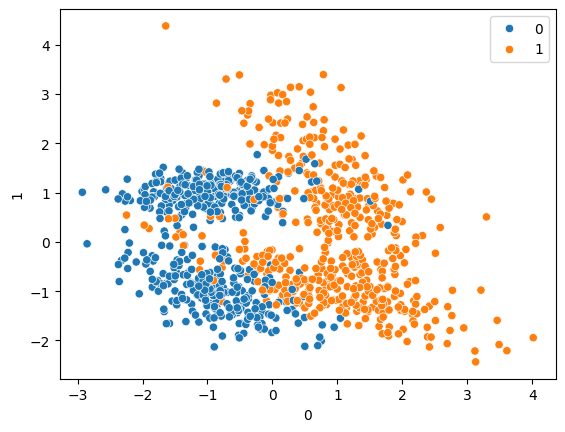

In [131]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [133]:
from sklearn.svm import SVC

In [134]:
svc = SVC(kernel="linear")

In [135]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [136]:
svc.coef_

array([[1.75543707, 0.3076299 ]])

In [137]:
## Prediction
y_pred = svc.predict(X_test)

In [138]:
from sklearn.metrics import classification_report,confusion_matrix

In [139]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       132
           1       0.89      0.83      0.86       118

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250

[[120  12]
 [ 20  98]]


In [140]:
rbf = SVC(kernel='rbf')

In [141]:
rbf.fit(X_train,y_train)

SVC()

In [142]:
## Prediction 
y_pred1 = rbf.predict(X_test)

In [143]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       132
           1       0.94      0.87      0.91       118

    accuracy                           0.92       250
   macro avg       0.92      0.91      0.92       250
weighted avg       0.92      0.92      0.92       250

[[126   6]
 [ 15 103]]


In [144]:
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
## Prediction
y_pred2 = poly.predict(X_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       132
           1       0.86      0.81      0.83       118

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

[[116  16]
 [ 23  95]]


In [145]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred3 = sigmoid.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       132
           1       0.71      0.61      0.66       118

    accuracy                           0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.70      0.70       250

[[103  29]
 [ 46  72]]


In [146]:
sigmoid.intercept_

array([1.11439455])

### Hyperparameter Tuning with SVC


In [147]:
from sklearn.model_selection import GridSearchCV


#defining parameter range
param_grid = {'C':[0.1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf']}

In [148]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [149]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [150]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [151]:
y_pred4 = grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       132
           1       0.94      0.86      0.90       118

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[126   6]
 [ 16 102]]
